In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# 데이터 준비

In [ ]:
rawdf = pd.read_csv('https://raw.githubusercontent.com/shstudy/ITB_3team/main/wo_data_20_21Y%2B11-28.csv', encoding = 'CP949')

In [ ]:
#df                #데이터 프레임 확인
#df.isnull().sum() #결측치 확인
#df.info()         #데이터 유형 확인

In [ ]:
print(rawdf['재방문의도'].describe())

count    1184.000000
mean        3.875000
std         0.561892
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: 재방문의도, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


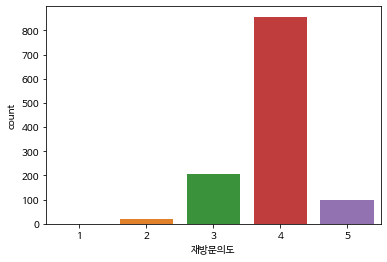

In [ ]:
sns.countplot(rawdf['재방문의도'])

In [ ]:
rawdf['재방문여부'] = rawdf['재방문의도'] > 3

In [ ]:
# 0,1로 바꾸기
x_list = ["관광휴양여부", "여행활동1", "여행활동2","여행활동3", "여행활동4", "여행활동5"]

for i in x_list:
  x1 = {i : {'N':'0','Y':'1'}}
  rawdf.replace(x1, inplace=True)

x2 = {'재방문여부' :{False:'재방문NO',True:'재방문YES'}}
rawdf.replace(x2, inplace=True)

In [ ]:
#df.columns

In [ ]:
#자료형 바꾸기
df = rawdf.astype(dtype='object')
df = df.astype({'여행일수(박)':'int', '여행총경비':'int', '지출비용포함인원수':'int','1인지출비용':'int'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


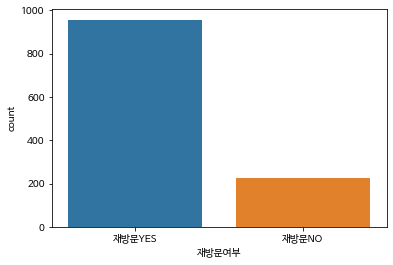

In [ ]:
sns.countplot(rawdf['재방문여부'])  #1:yes, 2:no

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


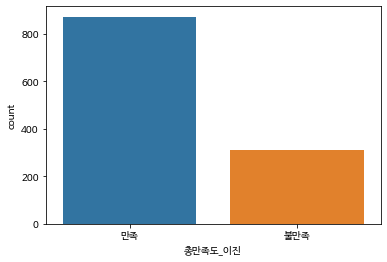

In [ ]:
sns.countplot(rawdf['총만족도_이진'])

# 2. 고객기본정보와 여행활동 정보로 '총만족도'를 예측할 수 있을까?

In [ ]:
df1 = df.drop(['ID', '연도', '학력', '혼인상태', '주5일근무제실시여부', '계절', '여행총경비', 
              '지출비용포함인원수', '개인휴가사용여부','시', '여행지선택이유_1순위', '여행지선택이유_2순위',
              '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
              '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
              '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수','총만족도', '재방문여부'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   성별        1184 non-null   object
 1   연령        1184 non-null   object
 2   거주지역      1184 non-null   object
 3   직업        1184 non-null   object
 4   주업        1184 non-null   object
 5   직장지위      1184 non-null   object
 6   차량보유여부    1184 non-null   object
 7   개인소득      1184 non-null   object
 8   관광휴양여부    1184 non-null   object
 9   여행유형      1184 non-null   object
 10  월         1184 non-null   object
 11  여행일수(박)   1184 non-null   int64 
 12  1인지출비용    1184 non-null   int64 
 13  지역코드      1184 non-null   object
 14  숙박시설      1184 non-null   object
 15  여행활동1     1184 non-null   object
 16  여행활동2     1184 non-null   object
 17  여행활동3     1184 non-null   object
 18  여행활동4     1184 non-null   object
 19  여행활동5     1184 non-null   object
 20  주요이동교통수단  1184 non-null   object
 21  총만족도_이진   1184

학습용 데이터 정확도: 0.857
시험용 데이터 정확도: 0.713


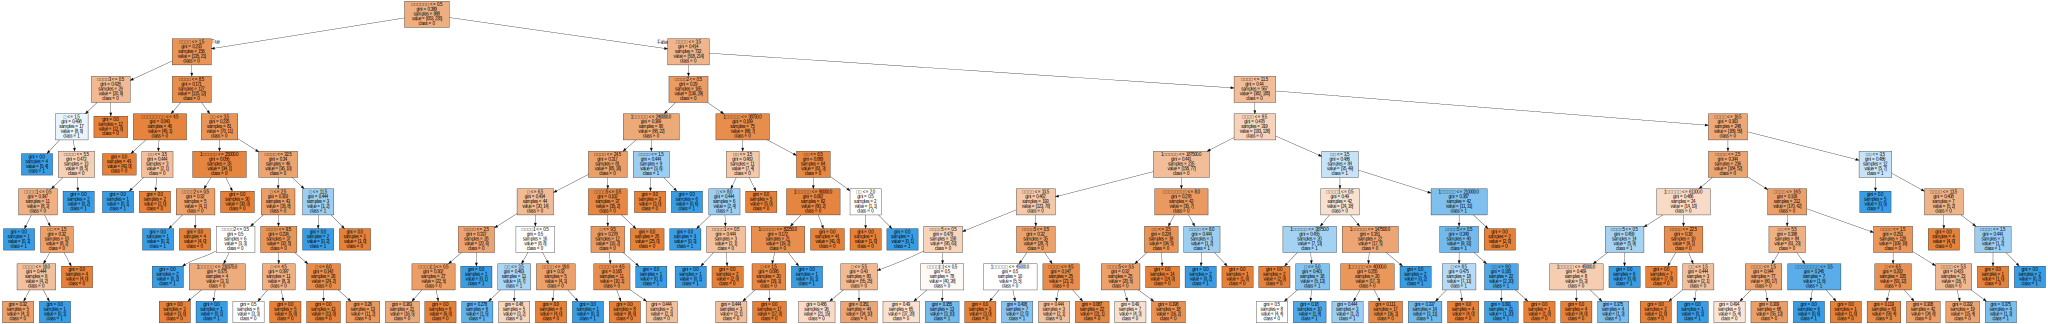

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "0", "1"],
                feature_names=df1.columns[:-1], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##1. 랜덤포레스트

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   성별        1184 non-null   object
 1   연령        1184 non-null   object
 2   거주지역      1184 non-null   object
 3   직업        1184 non-null   object
 4   주업        1184 non-null   object
 5   직장지위      1184 non-null   object
 6   차량보유여부    1184 non-null   object
 7   개인소득      1184 non-null   object
 8   관광휴양여부    1184 non-null   object
 9   여행유형      1184 non-null   object
 10  월         1184 non-null   object
 11  여행일수(박)   1184 non-null   int64 
 12  1인지출비용    1184 non-null   int64 
 13  지역코드      1184 non-null   object
 14  숙박시설      1184 non-null   object
 15  여행활동1     1184 non-null   object
 16  여행활동2     1184 non-null   object
 17  여행활동3     1184 non-null   object
 18  여행활동4     1184 non-null   object
 19  여행활동5     1184 non-null   object
 20  주요이동교통수단  1184 non-null   object
 21  총만족도_이진   1184

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

forest = RandomForestClassifier(n_estimators=100, random_state=3)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.753


In [ ]:
for i in range(3,10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
  forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = i)
  forest.fit(X_train, y_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)),"\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.735
시험용 데이터 세트 정확도: 0.740 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.739
시험용 데이터 세트 정확도: 0.740 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.743
시험용 데이터 세트 정확도: 0.740 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 0.758
시험용 데이터 세트 정확도: 0.743 

========나무의 깊이: 7 ========
학습용 데이터 세트 정확도: 0.774
시험용 데이터 세트 정확도: 0.753 

========나무의 깊이: 8 ========
학습용 데이터 세트 정확도: 0.812
시험용 데이터 세트 정확도: 0.760 

========나무의 깊이: 9 ========
학습용 데이터 세트 정확도: 0.864
시험용 데이터 세트 정확도: 0.753 



중요 변수

In [ ]:
#max_depth = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = 8)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=3)

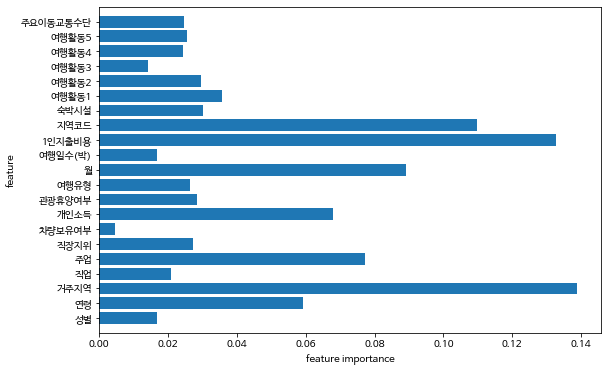

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df1.columns[:21])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df1.columns[:21])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

##2. 그래디언트부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

gbrt = GradientBoostingClassifier(random_state=3)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.847
시험용 데이터 세트 정확도: 0.757


In [ ]:
for i in range(3,10):
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = i)  
  gbrt.fit(X_train, y_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)), "\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.847
시험용 데이터 세트 정확도: 0.757 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.918
시험용 데이터 세트 정확도: 0.757 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.971
시험용 데이터 세트 정확도: 0.757 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 0.999
시험용 데이터 세트 정확도: 0.740 

========나무의 깊이: 7 ========
학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.747 

========나무의 깊이: 8 ========
학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.740 

========나무의 깊이: 9 ========
학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.747 



In [ ]:
for j in range(1, 101, 5):
  i = j/1000
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = 5, learning_rate = i)  
  gbrt.fit(X_train, y_train)
  print("========학습률:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)), "\n")

========학습률: 0.001 ========
학습용 데이터 세트 정확도: 0.735
시험용 데이터 세트 정확도: 0.740 

========학습률: 0.006 ========
학습용 데이터 세트 정확도: 0.749
시험용 데이터 세트 정확도: 0.740 

========학습률: 0.011 ========
학습용 데이터 세트 정확도: 0.780
시험용 데이터 세트 정확도: 0.757 

========학습률: 0.016 ========
학습용 데이터 세트 정확도: 0.809
시험용 데이터 세트 정확도: 0.764 

========학습률: 0.021 ========
학습용 데이터 세트 정확도: 0.830
시험용 데이터 세트 정확도: 0.764 

========학습률: 0.026 ========
학습용 데이터 세트 정확도: 0.854
시험용 데이터 세트 정확도: 0.767 

========학습률: 0.031 ========
학습용 데이터 세트 정확도: 0.860
시험용 데이터 세트 정확도: 0.760 

========학습률: 0.036 ========
학습용 데이터 세트 정확도: 0.878
시험용 데이터 세트 정확도: 0.767 

========학습률: 0.041 ========
학습용 데이터 세트 정확도: 0.887
시험용 데이터 세트 정확도: 0.760 

========학습률: 0.046 ========
학습용 데이터 세트 정확도: 0.908
시험용 데이터 세트 정확도: 0.760 

========학습률: 0.051 ========
학습용 데이터 세트 정확도: 0.911
시험용 데이터 세트 정확도: 0.760 

========학습률: 0.056 ========
학습용 데이터 세트 정확도: 0.919
시험용 데이터 세트 정확도: 0.764 

========학습률: 0.061 ========
학습용 데이터 세트 정확도: 0.931
시험용 데이터 세트 정확도: 0.767 

========학습률: 0.066 ========
학습용 데이터 세트

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.066, max_depth = 5)    #학습률: 0.066
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.938
시험용 데이터 세트 정확도: 0.774


In [ ]:
#변수 중요도

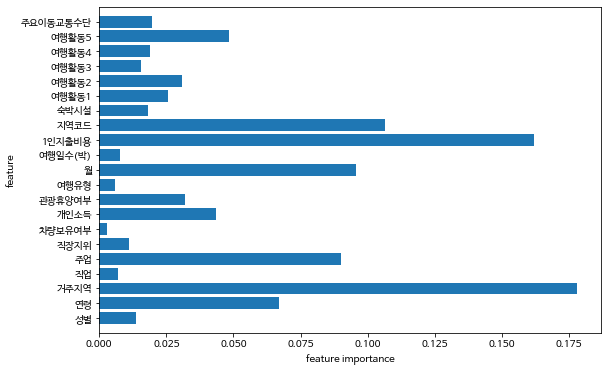

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df1.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df1.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbrt)


##3. 교차검증

In [ ]:
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy mean
Random forest :0.742
Gradient boosting :0.730


## 4. 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters1 = {'max_depth':[3,5,6,7,8,9], 'n_estimators':[80, 90, 100, 110]}
parameters2 = {'max_depth':[1,3,5,7,8,9], 'learning_rate':[0.1,0.08, 0.01]}

In [ ]:
grid_forest = GridSearchCV(forest, param_grid=parameters1, cv=5, refit=True)
grid_forest.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters2, cv=5, refit=True)
grid_gbrt.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 7, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.7421
GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.7410


In [ ]:
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X_test, y_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

forest: 시험용 데이터 세트 정확도: 0.753
gbrt: 시험용 데이터 세트 정확도: 0.757


## 5. 정오분류표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

forest_pred= grid_forest.predict(X_test)
gbrt_pred = grid_gbrt.predict(X_test)


print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Random forest 시험용 데이터 세트 정확도:0.753
[[219   0]
 [ 73   4]]
Gradient boosting 시험용 데이터 세트 정확도:0.757
[[207  12]
 [ 60  17]]


In [ ]:
print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y_test, forest_pred, average='binary', pos_label="만족")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="만족")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, forest_pred, average='binary', pos_label="만족")))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label="만족")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="만족")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label="만족")))


Random forest
정밀도:0.750
재현율:1.000
f1-measure:0.857
Gradienc boosting
정밀도:0.775
재현율:0.945
f1-measure:0.852


##6. ROC

In [ ]:
forest.predict_proba(X_test)

array([[0.74974775, 0.25025225],
       [0.84635041, 0.15364959],
       [0.79425152, 0.20574848],
       [0.77358634, 0.22641366],
       [0.65029475, 0.34970525],
       [0.61544793, 0.38455207],
       [0.4378601 , 0.5621399 ],
       [0.72653849, 0.27346151],
       [0.74006826, 0.25993174],
       [0.68441426, 0.31558574],
       [0.79506449, 0.20493551],
       [0.68771093, 0.31228907],
       [0.80490428, 0.19509572],
       [0.53385248, 0.46614752],
       [0.89033366, 0.10966634],
       [0.61936414, 0.38063586],
       [0.76652658, 0.23347342],
       [0.72878595, 0.27121405],
       [0.69932555, 0.30067445],
       [0.7291554 , 0.2708446 ],
       [0.86483108, 0.13516892],
       [0.80690938, 0.19309062],
       [0.61550311, 0.38449689],
       [0.79401822, 0.20598178],
       [0.57527877, 0.42472123],
       [0.89097029, 0.10902971],
       [0.86220013, 0.13779987],
       [0.89167251, 0.10832749],
       [0.80625519, 0.19374481],
       [0.65110582, 0.34889418],
       [0.

In [ ]:
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, -1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:,-1])
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt))

Random Forest의 AUC: 0.689
Gradient Boosting의 AUC: 0.702


#고객의 개인정보와 여행 만족도 정보만으로 '총만족도'를 예측할 수 있을까?

##1. 랜덤 포레스트

In [ ]:
df2 = df.drop(['ID', '연도',  '학력',  '주5일근무제실시여부', '계절', '여행총경비', 
              '지출비용포함인원수', '개인휴가사용여부','시', 
               '여행활동1', '여행활동2', '여행활동3', '여행활동4', '여행활동5',
              '전반적만족도', '재방문의도', '타인추천의도', '만족도점수', '총만족도', '재방문여부'], axis = 1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   성별               1184 non-null   object
 1   연령               1184 non-null   object
 2   혼인상태             1184 non-null   object
 3   거주지역             1184 non-null   object
 4   직업               1184 non-null   object
 5   주업               1184 non-null   object
 6   직장지위             1184 non-null   object
 7   차량보유여부           1184 non-null   object
 8   개인소득             1184 non-null   object
 9   관광휴양여부           1184 non-null   object
 10  여행유형             1184 non-null   object
 11  월                1184 non-null   object
 12  여행일수(박)          1184 non-null   int64 
 13  1인지출비용           1184 non-null   int64 
 14  지역코드             1184 non-null   object
 15  숙박시설             1184 non-null   object
 16  주요이동교통수단         1184 non-null   object
 17  여행지선택이유_1순위      1184 non-null   

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

forest = RandomForestClassifier(n_estimators=100, random_state=3)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.838


In [ ]:
for i in range(3,10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
  forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = i)
  forest.fit(X_train, y_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)),"\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.810
시험용 데이터 세트 정확도: 0.797 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.831
시험용 데이터 세트 정확도: 0.811 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.851
시험용 데이터 세트 정확도: 0.821 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 0.872
시험용 데이터 세트 정확도: 0.838 

========나무의 깊이: 7 ========
학습용 데이터 세트 정확도: 0.893
시험용 데이터 세트 정확도: 0.838 

========나무의 깊이: 8 ========
학습용 데이터 세트 정확도: 0.909
시험용 데이터 세트 정확도: 0.831 

========나무의 깊이: 9 ========
학습용 데이터 세트 정확도: 0.923
시험용 데이터 세트 정확도: 0.841 



In [ ]:
#max_depth = 7일때 시험용데이터 정확도가 가장 높음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = 7)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=3)

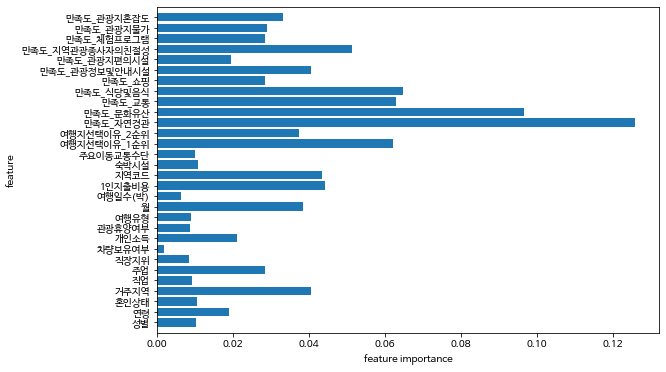

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df2.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df2.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

##2. 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

gbrt = GradientBoostingClassifier(random_state=3)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.923
시험용 데이터 세트 정확도: 0.831


In [ ]:
for i in range(3,7):
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = i)  
  gbrt.fit(X_train, y_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)), "\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.923
시험용 데이터 세트 정확도: 0.831 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.975
시험용 데이터 세트 정확도: 0.818 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.997
시험용 데이터 세트 정확도: 0.818 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.824 



In [ ]:
for j in range(1, 101, 5):
  i = j/1000
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = 5, learning_rate = i)  
  gbrt.fit(X_train, y_train)
  print("========학습률:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)), "\n")

========학습률: 0.001 ========
학습용 데이터 세트 정확도: 0.735
시험용 데이터 세트 정확도: 0.740 

========학습률: 0.006 ========
학습용 데이터 세트 정확도: 0.821
시험용 데이터 세트 정확도: 0.797 

========학습률: 0.011 ========
학습용 데이터 세트 정확도: 0.863
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.016 ========
학습용 데이터 세트 정확도: 0.891
시험용 데이터 세트 정확도: 0.818 

========학습률: 0.021 ========
학습용 데이터 세트 정확도: 0.903
시험용 데이터 세트 정확도: 0.824 

========학습률: 0.026 ========
학습용 데이터 세트 정확도: 0.918
시험용 데이터 세트 정확도: 0.821 

========학습률: 0.031 ========
학습용 데이터 세트 정확도: 0.934
시험용 데이터 세트 정확도: 0.821 

========학습률: 0.036 ========
학습용 데이터 세트 정확도: 0.943
시험용 데이터 세트 정확도: 0.834 

========학습률: 0.041 ========
학습용 데이터 세트 정확도: 0.953
시험용 데이터 세트 정확도: 0.824 

========학습률: 0.046 ========
학습용 데이터 세트 정확도: 0.962
시험용 데이터 세트 정확도: 0.821 

========학습률: 0.051 ========
학습용 데이터 세트 정확도: 0.966
시험용 데이터 세트 정확도: 0.824 

========학습률: 0.056 ========
학습용 데이터 세트 정확도: 0.976
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.061 ========
학습용 데이터 세트 정확도: 0.980
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.066 ========
학습용 데이터 세트

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.066, max_depth = 5)    #학습률: 0.066
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.984
시험용 데이터 세트 정확도: 0.828


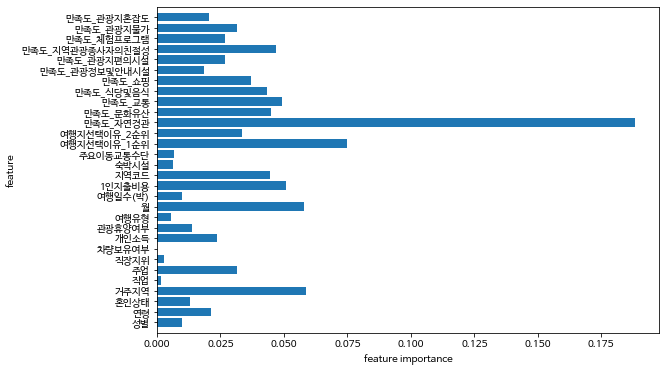

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df2.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df2.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbrt)

##3. 교차검증

In [ ]:
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy mean
Random forest :0.809
Gradient boosting :0.804


##4. 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters1 = {'max_depth':[3,5,6,7,8], 'n_estimators':[80, 90, 100]}
parameters2 = {'max_depth':[1,3,5,6,7], 'learning_rate':[0.1,0.02,0.08, 0.01]}

grid_forest = GridSearchCV(forest, param_grid=parameters1, cv=5, refit=True)
grid_forest.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters2, cv=5, refit=True)
grid_gbrt.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 8, 'n_estimators': 80}
GridSearchCV 최고 정확도: 0.8130
GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 1}
GridSearchCV 최고 정확도: 0.8018


In [ ]:
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X_test, y_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

forest: 시험용 데이터 세트 정확도: 0.838
gbrt: 시험용 데이터 세트 정확도: 0.824


##5. 정오분류표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

forest_pred= grid_forest.predict(X_test)
gbrt_pred = grid_gbrt.predict(X_test)


print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Random forest 시험용 데이터 세트 정확도:0.838
[[209  10]
 [ 38  39]]
Gradient boosting 시험용 데이터 세트 정확도:0.824
[[208  11]
 [ 41  36]]


In [ ]:
print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y_test, forest_pred, average='binary', pos_label="만족")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="만족")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, forest_pred, average='binary', pos_label="만족")))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label="만족")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="만족")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label="만족")))


Random forest
정밀도:0.846
재현율:0.954
f1-measure:0.897
Gradienc boosting
정밀도:0.835
재현율:0.950
f1-measure:0.889


##6. ROC

In [ ]:
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, -1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, -1])
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt))

Random Forest의 AUC: 0.889
Gradient Boosting의 AUC: 0.862


#고객기본정보와 여행활동 정보로 '재방문여부'를 예측할 수 있을까?

##1. 랜덤포레스트

In [ ]:
df21 = df.drop(['ID', '연도', '학력',  '주5일근무제실시여부', '계절', '차량보유여부', 
              '지출비용포함인원수', '개인휴가사용여부','시', '여행지선택이유_1순위', '여행지선택이유_2순위',
              '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
              '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
              '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수','총만족도', '총만족도_이진'], axis = 1)
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   성별        1184 non-null   object
 1   연령        1184 non-null   object
 2   혼인상태      1184 non-null   object
 3   거주지역      1184 non-null   object
 4   직업        1184 non-null   object
 5   주업        1184 non-null   object
 6   직장지위      1184 non-null   object
 7   개인소득      1184 non-null   object
 8   관광휴양여부    1184 non-null   object
 9   여행유형      1184 non-null   object
 10  월         1184 non-null   object
 11  여행일수(박)   1184 non-null   int64 
 12  여행총경비     1184 non-null   int64 
 13  1인지출비용    1184 non-null   int64 
 14  지역코드      1184 non-null   object
 15  숙박시설      1184 non-null   object
 16  여행활동1     1184 non-null   object
 17  여행활동2     1184 non-null   object
 18  여행활동3     1184 non-null   object
 19  여행활동4     1184 non-null   object
 20  여행활동5     1184 non-null   object
 21  주요이동교통수단  1184

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X1 = df21.iloc[:, :-1]
y1 = df21.iloc[:, -1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=3)

forest = RandomForestClassifier(n_estimators=100, random_state=3)
forest.fit(X1_train, y1_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X1_train, y1_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X1_test, y1_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.811


In [ ]:
for i in range(3,15):
  X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=3)
  forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = i)
  forest.fit(X1_train, y1_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X1_train, y1_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X1_test, y1_test)),"\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.812
시험용 데이터 세트 정확도: 0.801 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.814
시험용 데이터 세트 정확도: 0.801 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.816
시험용 데이터 세트 정확도: 0.801 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 0.824
시험용 데이터 세트 정확도: 0.804 

========나무의 깊이: 7 ========
학습용 데이터 세트 정확도: 0.831
시험용 데이터 세트 정확도: 0.807 

========나무의 깊이: 8 ========
학습용 데이터 세트 정확도: 0.845
시험용 데이터 세트 정확도: 0.807 

========나무의 깊이: 9 ========
학습용 데이터 세트 정확도: 0.865
시험용 데이터 세트 정확도: 0.807 

========나무의 깊이: 10 ========
학습용 데이터 세트 정확도: 0.887
시험용 데이터 세트 정확도: 0.807 

========나무의 깊이: 11 ========
학습용 데이터 세트 정확도: 0.912
시험용 데이터 세트 정확도: 0.804 

========나무의 깊이: 12 ========
학습용 데이터 세트 정확도: 0.936
시험용 데이터 세트 정확도: 0.811 

========나무의 깊이: 13 ========
학습용 데이터 세트 정확도: 0.959
시험용 데이터 세트 정확도: 0.807 

========나무의 깊이: 14 ========
학습용 데이터 세트 정확도: 0.981
시험용 데이터 세트 정확도: 0.804 



In [ ]:
#max_depth = 12
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=3)
forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = 12)
forest.fit(X1_train, y1_train)

RandomForestClassifier(max_depth=12, random_state=3)

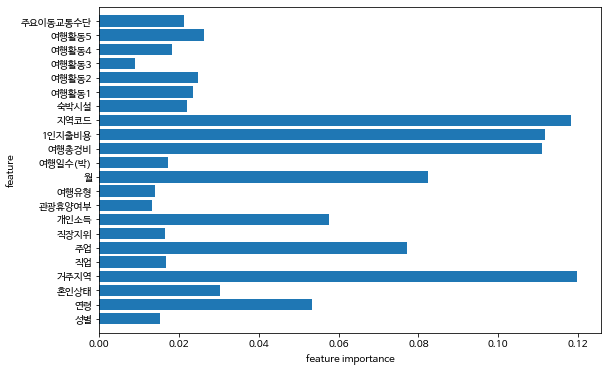

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df21.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df21.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

##2. 그래디언트부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

X1 = df21.iloc[:, :-1]
y1 = df21.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=3)

gbrt = GradientBoostingClassifier(random_state=3)
gbrt.fit(X1_train, y1_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_train, y1_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_test, y1_test)))

학습용 데이터 세트 정확도: 0.874
시험용 데이터 세트 정확도: 0.811


In [ ]:
for i in range(3,7):
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = i)  
  gbrt.fit(X1_train, y1_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_train, y1_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_test, y1_test)), "\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.874
시험용 데이터 세트 정확도: 0.811 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.946
시험용 데이터 세트 정확도: 0.794 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.974
시험용 데이터 세트 정확도: 0.797 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.797 



In [ ]:
for j in range(1, 101, 5):
  i = j/1000
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = 3, learning_rate = i)  
  gbrt.fit(X1_train, y1_train)
  print("========학습률:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_train, y1_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_test, y1_test)), "\n")


========학습률: 0.001 ========
학습용 데이터 세트 정확도: 0.811
시험용 데이터 세트 정확도: 0.801 

========학습률: 0.006 ========
학습용 데이터 세트 정확도: 0.811
시험용 데이터 세트 정확도: 0.801 

========학습률: 0.011 ========
학습용 데이터 세트 정확도: 0.818
시험용 데이터 세트 정확도: 0.807 

========학습률: 0.016 ========
학습용 데이터 세트 정확도: 0.824
시험용 데이터 세트 정확도: 0.807 

========학습률: 0.021 ========
학습용 데이터 세트 정확도: 0.828
시험용 데이터 세트 정확도: 0.811 

========학습률: 0.026 ========
학습용 데이터 세트 정확도: 0.829
시험용 데이터 세트 정확도: 0.811 

========학습률: 0.031 ========
학습용 데이터 세트 정확도: 0.834
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.036 ========
학습용 데이터 세트 정확도: 0.836
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.041 ========
학습용 데이터 세트 정확도: 0.837
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.046 ========
학습용 데이터 세트 정확도: 0.838
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.051 ========
학습용 데이터 세트 정확도: 0.840
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.056 ========
학습용 데이터 세트 정확도: 0.843
시험용 데이터 세트 정확도: 0.811 

========학습률: 0.061 ========
학습용 데이터 세트 정확도: 0.849
시험용 데이터 세트 정확도: 0.814 

========학습률: 0.066 ========
학습용 데이터 세트

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.076, max_depth = 3)    #학습률: 0.076
gbrt.fit(X1_train, y1_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_train, y1_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_test, y1_test)))

학습용 데이터 세트 정확도: 0.855
시험용 데이터 세트 정확도: 0.814


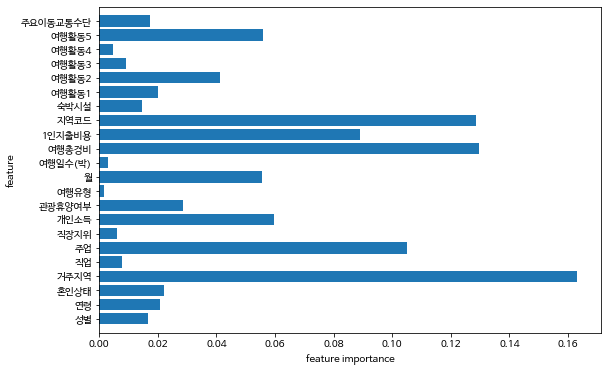

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df21.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df21.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbrt)

##3. 교차검증

In [ ]:
rf_scores = cross_val_score(forest, X1_train, y1_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X1_train, y1_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy mean
Random forest :0.814
Gradient boosting :0.815


##4. 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters1 = {'max_depth':[3,5,6,7,8], 'n_estimators':[80, 90, 100]}
parameters2 = {'max_depth':[1,3,5,6,7], 'learning_rate':[0.1,0.02,0.08, 0.01]}

grid_forest = GridSearchCV(forest, param_grid=parameters1, cv=5, refit=True)
grid_forest.fit(X1_train, y1_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters2, cv=5, refit=True)
grid_gbrt.fit(X1_train, y1_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.8176
GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.8243


In [ ]:
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X1_test, y1_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X1_test, y1_test)))

forest: 시험용 데이터 세트 정확도: 0.807
gbrt: 시험용 데이터 세트 정확도: 0.811


##5. 정오분류표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

forest_pred = grid_forest.predict(X1_test)
gbrt_pred = grid_gbrt.predict(X1_test)

print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y1_test, forest_pred)))
print(confusion_matrix(y1_test, forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y1_test, gbrt_pred)))
print(confusion_matrix(y1_test, gbrt_pred))

Random forest 시험용 데이터 세트 정확도:0.807
[[  2  57]
 [  0 237]]
Gradient boosting 시험용 데이터 세트 정확도:0.811
[[  5  54]
 [  2 235]]


In [ ]:
print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y1_test, forest_pred, average='binary', pos_label="재방문YES")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y1_test, forest_pred, average='binary', pos_label="재방문YES")))
print('f1-measure:{:.3f}'.format(f1_score(y1_test, forest_pred, average='binary', pos_label="재방문YES")))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y1_test, gbrt_pred, average='binary', pos_label="재방문YES")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y1_test, gbrt_pred, average='binary', pos_label="재방문YES")))
print('f1-measure:{:.3f}'.format(f1_score(y1_test, gbrt_pred, average='binary', pos_label="재방문YES")))

Random forest
정밀도:0.806
재현율:1.000
f1-measure:0.893
Gradienc boosting
정밀도:0.813
재현율:0.992
f1-measure:0.894


##6. ROC

In [ ]:
X1 = df21.iloc[:, :-1]
y1 = df21.iloc[:, -1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state=3)

In [ ]:
X1.columns

Index(['성별', '연령', '혼인상태', '거주지역', '직업', '주업', '직장지위', '개인소득', '관광휴양여부',
       '여행유형', '월', '여행일수(박)', '여행총경비', '1인지출비용', '지역코드', '숙박시설', '여행활동1',
       '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단'],
      dtype='object')

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = 12)
forest.fit(X1_train, y1_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X1_train, y1_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X1_test, y1_test)))


gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.076, max_depth = 3)    #학습률: 0.076
gbrt.fit(X1_train, y1_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_train, y1_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X1_test, y1_test)))

학습용 데이터 세트 정확도: 0.936
시험용 데이터 세트 정확도: 0.811
학습용 데이터 세트 정확도: 0.855
시험용 데이터 세트 정확도: 0.814


In [ ]:
X1_test.columns

Index(['성별', '연령', '혼인상태', '거주지역', '직업', '주업', '직장지위', '개인소득', '관광휴양여부',
       '여행유형', '월', '여행일수(박)', '여행총경비', '1인지출비용', '지역코드', '숙박시설', '여행활동1',
       '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단'],
      dtype='object')

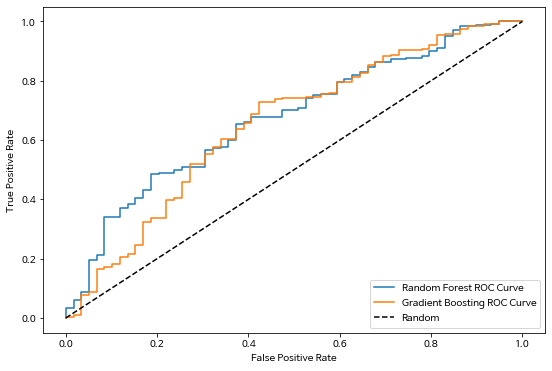

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr_rf, tpr_rf, cutoff_rf = roc_curve(y1_test, forest.predict_proba(X1_test)[:, -1], pos_label="재방문YES")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y1_test, grid_gbrt.predict_proba(X1_test)[:, -1], pos_label="재방문YES")

plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random") 

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [ ]:
auc_rf = roc_auc_score(y1_test, forest.predict_proba(X1_test)[:, -1])
auc_gbrt = roc_auc_score(y1_test, grid_gbrt.predict_proba(X1_test)[:, -1])
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt))

Random Forest의 AUC: 0.673
Gradient Boosting의 AUC: 0.652


#고객의 개인정보와 여행 만족도 정보만으로 '재방문여부'를 예측할 수 있을까?

In [ ]:
df22 = df.drop(['ID', '연도', '학력',  '주5일근무제실시여부', '계절', '차량보유여부', 
              '지출비용포함인원수', '개인휴가사용여부','시', 
              '여행활동1','여행활동2','여행활동3','여행활동4','여행활동5',
              '전반적만족도', '재방문의도', '타인추천의도', '만족도점수','총만족도', '총만족도_이진'], axis = 1)
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   성별               1184 non-null   object
 1   연령               1184 non-null   object
 2   혼인상태             1184 non-null   object
 3   거주지역             1184 non-null   object
 4   직업               1184 non-null   object
 5   주업               1184 non-null   object
 6   직장지위             1184 non-null   object
 7   개인소득             1184 non-null   object
 8   관광휴양여부           1184 non-null   object
 9   여행유형             1184 non-null   object
 10  월                1184 non-null   object
 11  여행일수(박)          1184 non-null   int64 
 12  여행총경비            1184 non-null   int64 
 13  1인지출비용           1184 non-null   int64 
 14  지역코드             1184 non-null   object
 15  숙박시설             1184 non-null   object
 16  주요이동교통수단         1184 non-null   object
 17  여행지선택이유_1순위      1184 non-null   

학습용 데이터 정확도: 0.941
시험용 데이터 정확도: 0.838


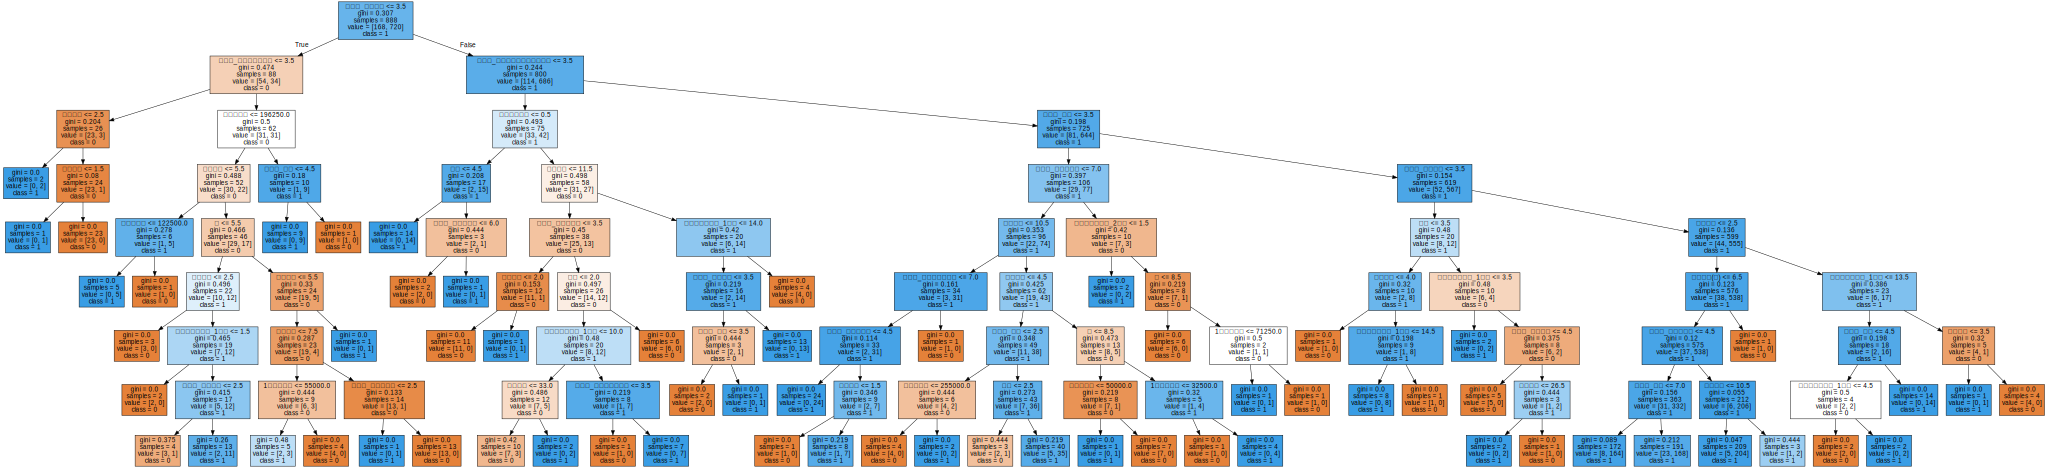

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df22.iloc[:, :-1]
y = df22.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "0", "1"],
                feature_names=df22.columns[:-1], impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##1. 랜덤포레스트

In [ ]:
df22 = df.drop(['ID', '연도', '학력',  '주5일근무제실시여부', '계절', '차량보유여부', 
              '지출비용포함인원수', '개인휴가사용여부','시', 
              '여행활동1','여행활동2','여행활동3','여행활동4','여행활동5',
              '전반적만족도', '재방문의도', '타인추천의도', '만족도점수','총만족도', '총만족도_이진'], axis = 1)
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   성별               1184 non-null   object
 1   연령               1184 non-null   object
 2   혼인상태             1184 non-null   object
 3   거주지역             1184 non-null   object
 4   직업               1184 non-null   object
 5   주업               1184 non-null   object
 6   직장지위             1184 non-null   object
 7   개인소득             1184 non-null   object
 8   관광휴양여부           1184 non-null   object
 9   여행유형             1184 non-null   object
 10  월                1184 non-null   object
 11  여행일수(박)          1184 non-null   int64 
 12  여행총경비            1184 non-null   int64 
 13  1인지출비용           1184 non-null   int64 
 14  지역코드             1184 non-null   object
 15  숙박시설             1184 non-null   object
 16  주요이동교통수단         1184 non-null   object
 17  여행지선택이유_1순위      1184 non-null   

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df22.iloc[:, :-1]
y = df22.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

forest = RandomForestClassifier(n_estimators=100, random_state=3)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.855


In [ ]:
for i in range(3,15):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
  forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = i)
  forest.fit(X_train, y_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)),"\n")

========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.846
시험용 데이터 세트 정확도: 0.831 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.874
시험용 데이터 세트 정확도: 0.848 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.895
시험용 데이터 세트 정확도: 0.848 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 0.905
시험용 데이터 세트 정확도: 0.845 

========나무의 깊이: 7 ========
학습용 데이터 세트 정확도: 0.925
시험용 데이터 세트 정확도: 0.858 

========나무의 깊이: 8 ========
학습용 데이터 세트 정확도: 0.934
시험용 데이터 세트 정확도: 0.865 

========나무의 깊이: 9 ========
학습용 데이터 세트 정확도: 0.950
시험용 데이터 세트 정확도: 0.865 

========나무의 깊이: 10 ========
학습용 데이터 세트 정확도: 0.961
시험용 데이터 세트 정확도: 0.858 

========나무의 깊이: 11 ========
학습용 데이터 세트 정확도: 0.974
시험용 데이터 세트 정확도: 0.855 

========나무의 깊이: 12 ========
학습용 데이터 세트 정확도: 0.981
시험용 데이터 세트 정확도: 0.861 

========나무의 깊이: 13 ========
학습용 데이터 세트 정확도: 0.988
시험용 데이터 세트 정확도: 0.865 

========나무의 깊이: 14 ========
학습용 데이터 세트 정확도: 0.993
시험용 데이터 세트 정확도: 0.861 



In [ ]:
#max_depth = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)
forest = RandomForestClassifier(n_estimators=100, random_state=3, max_depth = 8)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=3)

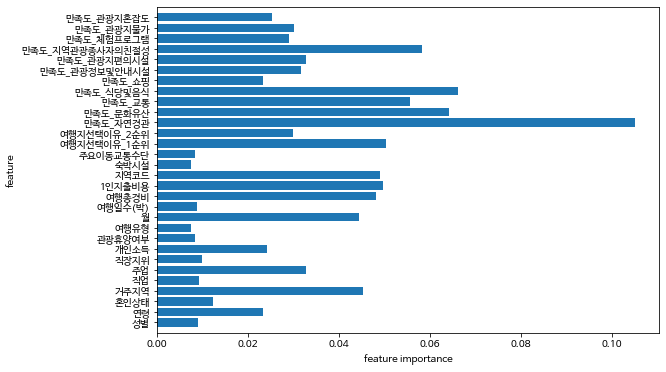

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df22.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df22.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

##2. 그래디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

X = df22.iloc[:, :-1]
y = df22.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=3)

gbrt = GradientBoostingClassifier(random_state=3)
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.947
시험용 데이터 세트 정확도: 0.878


In [ ]:
for i in range(3,7):
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = i)  
  gbrt.fit(X_train, y_train)
  print("========나무의 깊이:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)), "\n")


========나무의 깊이: 3 ========
학습용 데이터 세트 정확도: 0.947
시험용 데이터 세트 정확도: 0.878 

========나무의 깊이: 4 ========
학습용 데이터 세트 정확도: 0.985
시험용 데이터 세트 정확도: 0.861 

========나무의 깊이: 5 ========
학습용 데이터 세트 정확도: 0.998
시험용 데이터 세트 정확도: 0.861 

========나무의 깊이: 6 ========
학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.861 



In [ ]:
for j in range(1, 101, 5):
  i = j/1000
  gbrt = GradientBoostingClassifier(random_state=3, max_depth = 3, learning_rate = i)  
  gbrt.fit(X_train, y_train)
  print("========학습률:", i, "========")
  print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)), "\n")

========학습률: 0.001 ========
학습용 데이터 세트 정확도: 0.811
시험용 데이터 세트 정확도: 0.801 

========학습률: 0.006 ========
학습용 데이터 세트 정확도: 0.828
시험용 데이터 세트 정확도: 0.818 

========학습률: 0.011 ========
학습용 데이터 세트 정확도: 0.857
시험용 데이터 세트 정확도: 0.838 

========학습률: 0.016 ========
학습용 데이터 세트 정확도: 0.880
시험용 데이터 세트 정확도: 0.858 

========학습률: 0.021 ========
학습용 데이터 세트 정확도: 0.892
시험용 데이터 세트 정확도: 0.858 

========학습률: 0.026 ========
학습용 데이터 세트 정확도: 0.893
시험용 데이터 세트 정확도: 0.858 

========학습률: 0.031 ========
학습용 데이터 세트 정확도: 0.899
시험용 데이터 세트 정확도: 0.865 

========학습률: 0.036 ========
학습용 데이터 세트 정확도: 0.909
시험용 데이터 세트 정확도: 0.865 

========학습률: 0.041 ========
학습용 데이터 세트 정확도: 0.912
시험용 데이터 세트 정확도: 0.875 

========학습률: 0.046 ========
학습용 데이터 세트 정확도: 0.917
시험용 데이터 세트 정확도: 0.868 

========학습률: 0.051 ========
학습용 데이터 세트 정확도: 0.917
시험용 데이터 세트 정확도: 0.875 

========학습률: 0.056 ========
학습용 데이터 세트 정확도: 0.922
시험용 데이터 세트 정확도: 0.882 

========학습률: 0.061 ========
학습용 데이터 세트 정확도: 0.927
시험용 데이터 세트 정확도: 0.861 

========학습률: 0.066 ========
학습용 데이터 세트

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.091, max_depth = 5)    #학습률: 0.091
gbrt.fit(X_train, y_train)
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.998
시험용 데이터 세트 정확도: 0.875


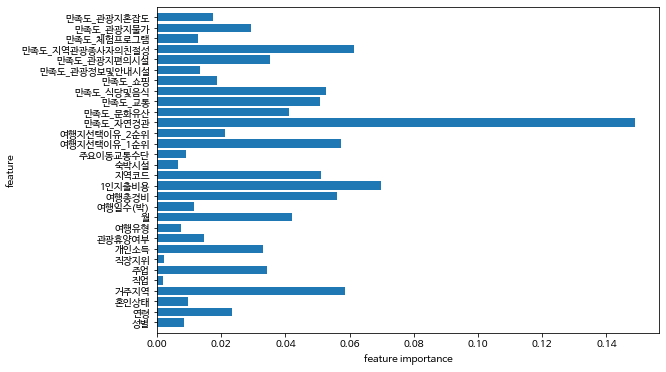

In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    plt.rc('font', family='NanumBarunGothic') 
    n_features = len(df22.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df22.columns[:-1])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances(gbrt)

##3. 교차검증


In [ ]:
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))  

Accuracy mean
Random forest :0.849
Gradient boosting :0.844


##4. 그리드서치

In [ ]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters1 = {'max_depth':[3,5,6,7,8], 'n_estimators':[80, 90, 100]}
parameters2 = {'max_depth':[1,3,5,6,7], 'learning_rate':[0.1,0.02,0.08, 0.01]}

In [ ]:
grid_forest = GridSearchCV(forest, param_grid=parameters1, cv=5, refit=True)
grid_forest.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters2, cv=5, refit=True)
grid_gbrt.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도: 0.8423
GridSearchCV 최적 파라미터: {'learning_rate': 0.02, 'max_depth': 3}
GridSearchCV 최고 정확도: 0.8491


In [ ]:
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X_test, y_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

forest: 시험용 데이터 세트 정확도: 0.865
gbrt: 시험용 데이터 세트 정확도: 0.858


##5. 정오분류표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

forest_pred= grid_forest.predict(X_test)
gbrt_pred = grid_gbrt.predict(X_test)


print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, forest_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Random forest 시험용 데이터 세트 정확도:0.865
[[ 22  37]
 [  3 234]]
Gradient boosting 시험용 데이터 세트 정확도:0.858
[[ 20  39]
 [  3 234]]


In [ ]:
print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y_test, forest_pred, average='binary', pos_label="재방문YES")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label="재방문YES")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, forest_pred, average='binary', pos_label="재방문YES")))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label="재방문YES")))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label="재방문YES")))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label="재방문YES")))


Random forest
정밀도:0.863
재현율:0.987
f1-measure:0.921
Gradienc boosting
정밀도:0.857
재현율:0.987
f1-measure:0.918


##6. ROC

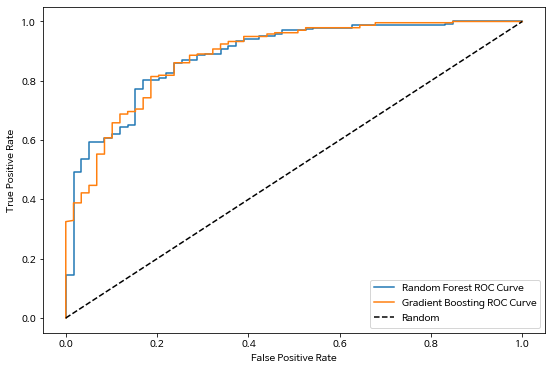

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr_rf, tpr_rf, cutoff_rf = roc_curve(y_test, forest.predict_proba(X_test)[:, -1], pos_label="재방문YES")
fpr_gbrt, tpr_gbrt, cutoff_gbrt = roc_curve(y_test, grid_gbrt.predict_proba(X_test)[:, -1], pos_label="재방문YES")

plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot(fpr_gbrt, tpr_gbrt, label="Gradient Boosting ROC Curve")
plt.plot([0,1], [0, 1], "k--", label ="Random") 

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [ ]:
auc_rf = roc_auc_score(y_test, forest.predict_proba(X_test)[:, -1])
auc_gbrt = roc_auc_score(y_test, grid_gbrt.predict_proba(X_test)[:, -1])
print("Random Forest의 AUC: {:.3f}".format(auc_rf))
print("Gradient Boosting의 AUC: {:.3f}".format(auc_gbrt))

Random Forest의 AUC: 0.886
Gradient Boosting의 AUC: 0.885
